In [1]:
%load_ext autoreload
%autoreload 2

In [24]:
%matplotlib inline  

import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

sys.path.append('..')
from utils import *
from data import *
from plotting import *
from experiments import top_k_split, value_split

In [3]:
kids = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.merged.cols.500k.csv')

Data shape: (502439, 37)
Droping NANs: 403753 (80.36%) left
Removing errors bigger than 1: 266766 (53.09%) left
Removing limiting magnitudes: 109011 (21.70%) left
Removing IMA flags: 89450 (17.80%) left


In [4]:
kids_x_sdss = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv', sdss_cleaning=True)

Data shape: (91317, 49)
Droping NANs: 89513 (98.02%) left
Removing errors bigger than 1: 84491 (92.52%) left
Removing limiting magnitudes: 74191 (81.25%) left
Removing IMA flags: 55787 (61.09%) left
Cleaning SDSS: 52010 left


In [5]:
print(describe_column(kids_x_sdss['CLASS']))

GALAXY - 32582 (62.65%)
QSO - 7265 (13.97%)
STAR - 12163 (23.39%)


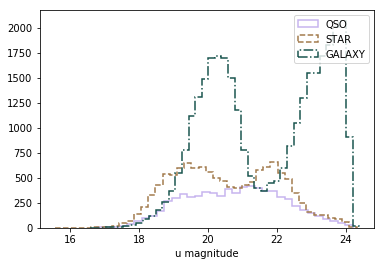

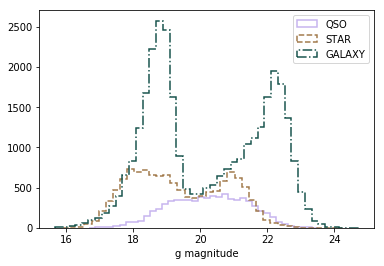

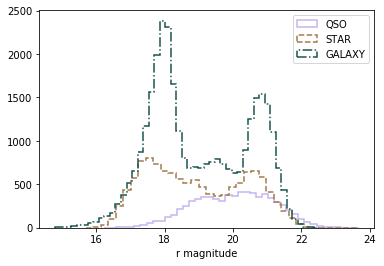

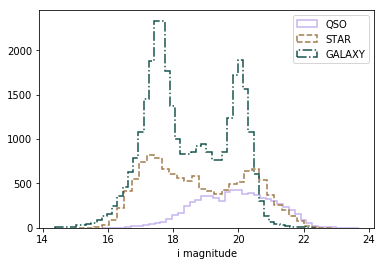

In [6]:
plot_class_histograms(kids_x_sdss, BAND_CALIB_COLUMNS)

IndexError: list index out of range

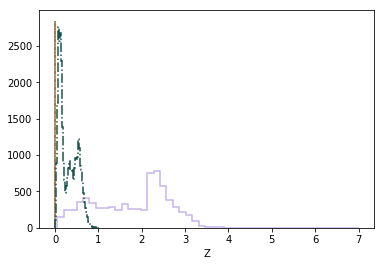

In [7]:
plot_class_histograms(kids_x_sdss, ['Z'])

## random

In [8]:
kids_train, kids_test = train_test_split(kids_x_sdss, test_size=0.2, random_state=427)

In [9]:
print(describe_column(kids_train['CLASS']))

GALAXY - 26045 (62.60%)
QSO - 5771 (13.87%)
STAR - 9792 (23.53%)


In [10]:
print(describe_column(kids_test['CLASS']))

GALAXY - 6537 (62.84%)
QSO - 1494 (14.36%)
STAR - 2371 (22.79%)


## top magnitude

In [38]:
_, _, kids_train, kids_test = value_split(kids_x_sdss[MAG_GAAP_CALIB_R], kids_x_sdss, value=21.5)

In [39]:
kids_test.shape[0] / kids_x_sdss.shape[0]

0.030051913093635838

In [28]:
print(describe_column(kids_train['CLASS']))

GALAXY - 22266 (65.00%)
QSO - 3476 (10.15%)
STAR - 8512 (24.85%)


In [29]:
print(describe_column(kids_test['CLASS']))

GALAXY - 10316 (58.10%)
QSO - 3789 (21.34%)
STAR - 3651 (20.56%)


In [32]:
_, _, kids_train, kids_test = value_split(kids_x_sdss[MAG_GAAP_CALIB_R], kids_x_sdss, value=21)

In [33]:
kids_test.shape[0] / kids_x_sdss.shape[0]

0.11495866179580849

In [34]:
print(describe_column(kids_train['CLASS']))

GALAXY - 29203 (63.44%)
QSO - 5687 (12.35%)
STAR - 11141 (24.20%)


In [35]:
print(describe_column(kids_test['CLASS']))

GALAXY - 3379 (56.51%)
QSO - 1578 (26.39%)
STAR - 1022 (17.09%)


In [20]:
_, _, kids_train, kids_test = top_k_split(kids_x_sdss[MAG_GAAP_CALIB_R], kids_x_sdss, test_size=0.2)

../utils.py:38: FutureWarning: Series.flags is deprecated and will be removed in a future version
  indices = indices if indices.flags.writeable else indices.copy()


In [21]:
print(describe_column(kids_train['CLASS']))

GALAXY - 26260 (63.11%)
QSO - 5028 (12.08%)
STAR - 10320 (24.80%)


In [22]:
print(describe_column(kids_test['CLASS']))

GALAXY - 6322 (60.78%)
QSO - 2237 (21.51%)
STAR - 1843 (17.72%)


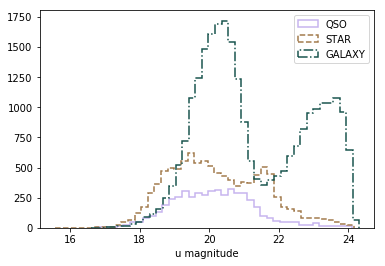

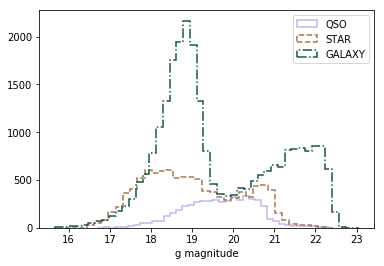

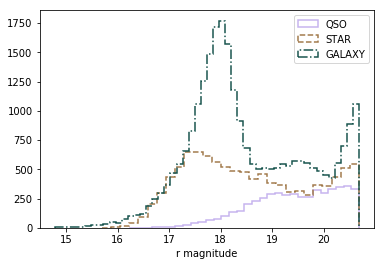

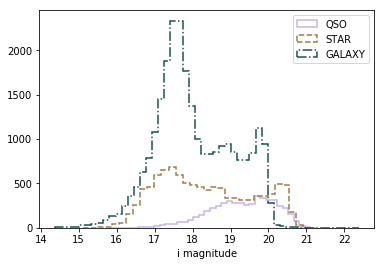

In [15]:
plot_class_histograms(kids_train, BAND_CALIB_COLUMNS)

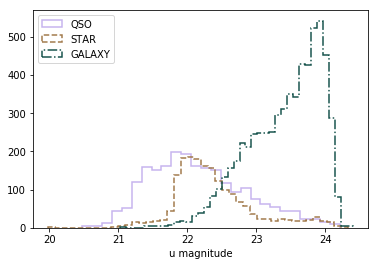

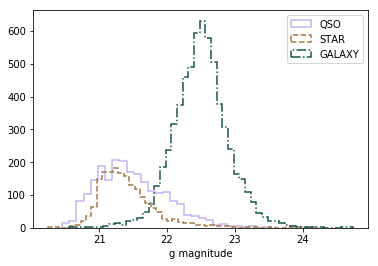

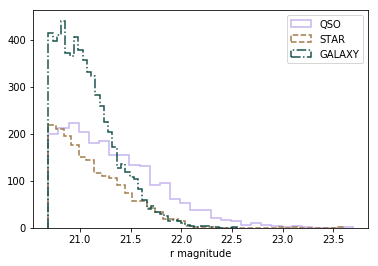

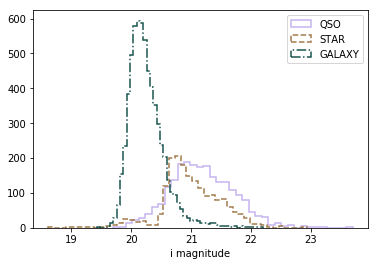

In [16]:
plot_class_histograms(kids_test, BAND_CALIB_COLUMNS)